In [19]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
import pickle 

warnings.filterwarnings('ignore')
%matplotlib inline

In [20]:
df = pd.read_csv('Stars.csv')

In [21]:
df.head(5)

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [23]:
df.sum().isnull()

Temperature (K)            False
Luminosity (L/Lo)          False
Radius (R/Ro)              False
Absolute magnitude (Mv)    False
Star type                  False
Star category              False
Star color                 False
Spectral Class             False
dtype: bool

In [24]:
df.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [25]:
df.columns

Index(['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color',
       'Spectral Class'],
      dtype='object')

In [26]:
df['Spectral Class'].value_counts()

Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64

In [27]:
df.replace({'Spectral Class':{'M':0, 'A':1, 'B':1, 'F':1, 'O':1, 'K':1, 'G':1 }}, inplace=True)

In [28]:
# Number of categories
df['Star type'].value_counts()

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 15.1+ KB


In [30]:
df['Star category'].unique()

array(['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence',
       'Supergiant', 'Hypergiant'], dtype=object)

In [31]:
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

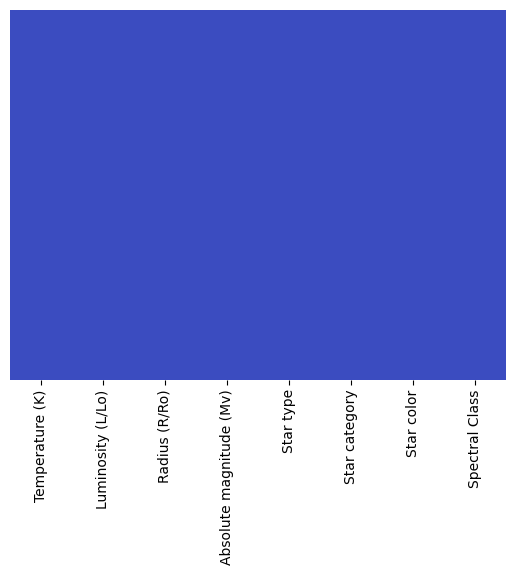

In [32]:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap='coolwarm')
plt.show()

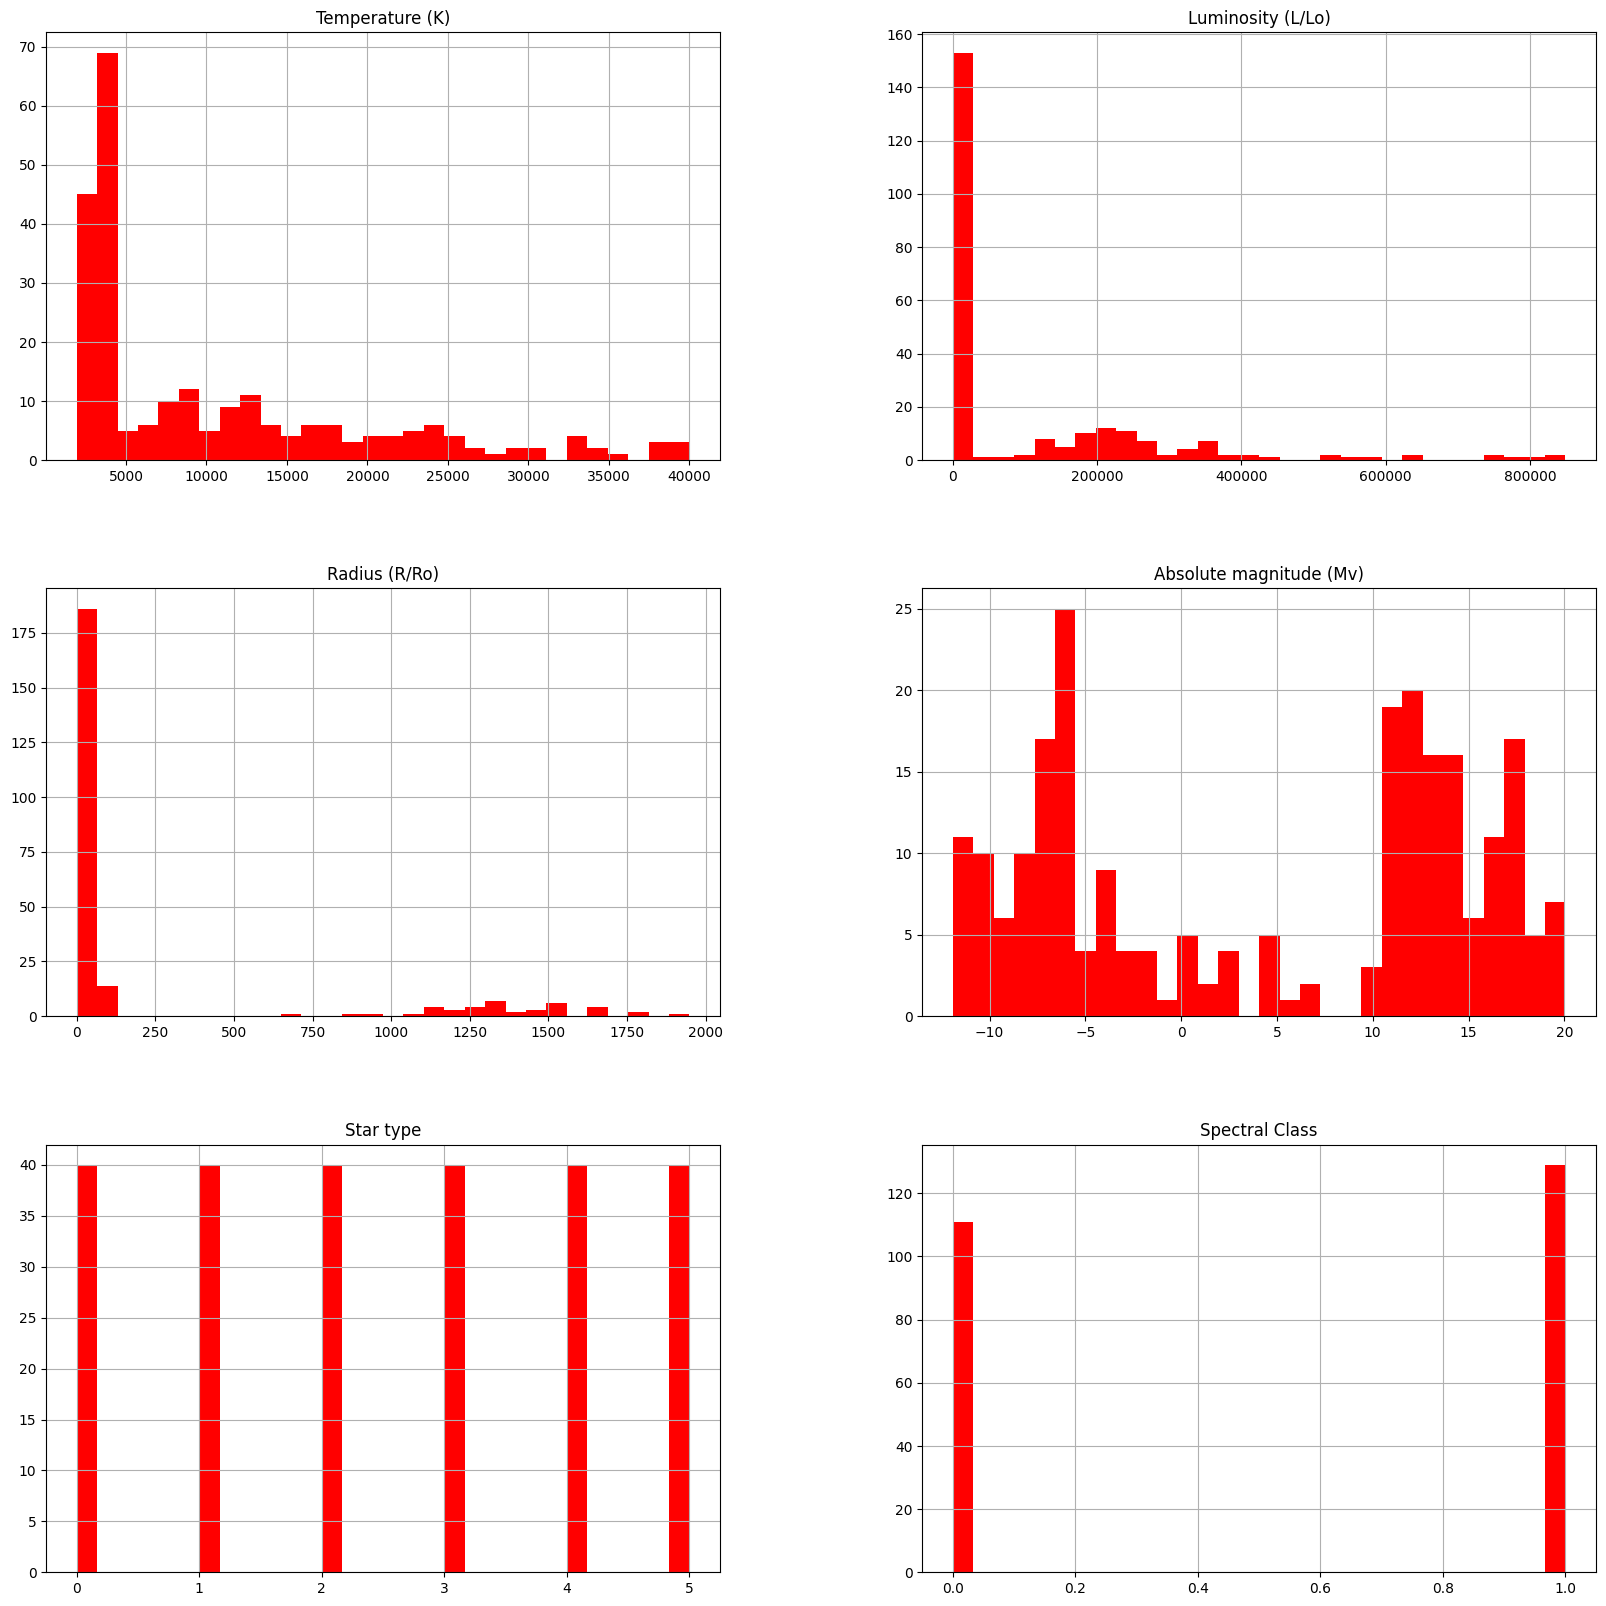

In [33]:
df.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()

In [34]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # Dùng sparse_output thay vì sparse
encoded_features = encoder.fit_transform(df[['Star category', 'Star color']])

# Chuyển về DataFrame và gộp vào df gốc
df_encoded = df.drop(columns=['Star category', 'Star color'])
df_encoded = pd.concat([df_encoded, pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())], axis=1)

df_encoded.head()


,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Spectral Class,Star category_Brown Dwarf,Star category_Hypergiant,Star category_Main Sequence,Star category_Red Dwarf,...,Star color_Pale yellow orange,Star color_Red,Star color_White,Star color_White-Yellow,Star color_Whitish,Star color_Yellowish,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish
0,3068,0.002400,0.1700,16.12,0,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3042,0.000500,0.1542,16.60,0,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2600,0.000300,0.1020,18.70,0,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2800,0.000200,0.1600,16.65,0,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1939,0.000138,0.1030,20.06,0,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature (K)                240 non-null    int64  
 1   Luminosity (L/Lo)              240 non-null    float64
 2   Radius (R/Ro)                  240 non-null    float64
 3   Absolute magnitude (Mv)        240 non-null    float64
 4   Star type                      240 non-null    int64  
 5   Spectral Class                 240 non-null    int64  
 6   Star category_Brown Dwarf      240 non-null    float64
 7   Star category_Hypergiant       240 non-null    float64
 8   Star category_Main Sequence    240 non-null    float64
 9   Star category_Red Dwarf        240 non-null    float64
 10  Star category_Supergiant       240 non-null    float64
 11  Star category_White Dwarf      240 non-null    float64
 12  Star color_Blue                240 non-null    flo

In [36]:
## Define X, y feature 
X = df_encoded.drop(columns=['Spectral Class'])
y = df_encoded['Spectral Class']

In [37]:
### Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Select model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [39]:
# Train model
model.fit(X_train,y_train)

LogisticRegression()

In [40]:
# Predict
y_pred = model.predict(X_test)

In [41]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [42]:
# Import function
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print(cr)

[[21  0]
 [ 1 26]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.96      0.98        27

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



In [43]:
### Apply multiple model in classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [44]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    try:
        print(f"Training model: {name}")
        model.fit(X_train, y_train)  # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Training set performance
        model_train_accuracy = accuracy_score(y_train, y_train_pred)
        model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
        model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
        model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
        
        # Test set performance
        model_test_accuracy = accuracy_score(y_test, y_test_pred)
        model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
        model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
        model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
        
        print(f"Model: {name}")
        print(f"Train Accuracy: {model_train_accuracy:.4f} | Test Accuracy: {model_test_accuracy:.4f}")
        print(f"Train F1-score: {model_train_f1:.4f} | Test F1-score: {model_test_f1:.4f}")
        print(f"Train Precision: {model_train_precision:.4f} | Test Precision: {model_test_precision:.4f}")
        print(f"Train Recall: {model_train_recall:.4f} | Test Recall: {model_test_recall:.4f}")
        print(f"Train ROC-AUC: {model_train_rocauc_score:.4f} | Test ROC-AUC: {model_test_rocauc_score:.4f}")
        print("=" * 50)

    except Exception as e:
        print(f"Model {name} error: {e}")
        print("-" * 50)

Training model: Logistic Regression
Model: Logistic Regression
Train Accuracy: 0.9844 | Test Accuracy: 0.9792
Train F1-score: 0.9844 | Test F1-score: 0.9792
Train Precision: 0.9849 | Test Precision: 0.9801
Train Recall: 0.9844 | Test Recall: 0.9792
Train ROC-AUC: 0.9853 | Test ROC-AUC: 0.9815
Training model: Random Forest
Model: Random Forest
Train Accuracy: 1.0000 | Test Accuracy: 1.0000
Train F1-score: 1.0000 | Test F1-score: 1.0000
Train Precision: 1.0000 | Test Precision: 1.0000
Train Recall: 1.0000 | Test Recall: 1.0000
Train ROC-AUC: 1.0000 | Test ROC-AUC: 1.0000
Training model: Gradient Boosting
Model: Gradient Boosting
Train Accuracy: 1.0000 | Test Accuracy: 1.0000
Train F1-score: 1.0000 | Test F1-score: 1.0000
Train Precision: 1.0000 | Test Precision: 1.0000
Train Recall: 1.0000 | Test Recall: 1.0000
Train ROC-AUC: 1.0000 | Test ROC-AUC: 1.0000
Training model: SVM
Model: SVM
Train Accuracy: 0.5938 | Test Accuracy: 0.6458
Train F1-score: 0.5778 | Test F1-score: 0.6373
Train Pre

In [45]:
## Hyperparameter Training

# Random Forest
rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

# Logistic Regression
lr_params = {
    "penalty": ["l1", "l2"],
    "C": [0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

# Support Vector Machine (SVC)
svc_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

# Gradient Boosting
gb_param = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

In [46]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("RandomForest", RandomForestClassifier(), rf_params),
    ("LogisticRegression", LogisticRegression(), lr_params),
    ("SVM", SVC(), svc_params),
    ("GradientBoosting", GradientBoostingClassifier(), gb_param),
]

In [47]:
randomcv_models

[('RandomForest',
  RandomForestClassifier(),
  {'n_estimators': [100, 200, 500],
   'max_depth': [5, 10, None],
   'min_samples_split': [2, 5, 10],
   'criterion': ['gini', 'entropy']}),
 ('LogisticRegression',
  LogisticRegression(),
  {'penalty': ['l1', 'l2'],
   'C': [0.1, 1, 10],
   'solver': ['liblinear', 'lbfgs']}),
 ('SVM',
  SVC(),
  {'C': [0.1, 1, 10],
   'kernel': ['linear', 'rbf', 'poly'],
   'gamma': ['scale', 'auto']}),
 ('GradientBoosting',
  GradientBoostingClassifier(),
  {'n_estimators': [50, 100, 200],
   'learning_rate': [0.01, 0.1, 0.2],
   'max_depth': [3, 5, 7]})]

In [48]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = HalvingRandomSearchCV(
        estimator=model,
        param_distributions=params,
        factor=2,
        cv=2,       
        n_jobs=-1
        )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for RandomForest -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None, 'criterion': 'entropy'}
---------------- Best Params for LogisticRegression -------------------
{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
---------------- Best Params for SVM -------------------
{'kernel': 'linear', 'gamma': 'scale', 'C': 10}
---------------- Best Params for GradientBoosting -------------------
{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2}


In [ ]:
# Dictionary of models with best parameters from HalvingRandomSearchCV
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500, min_samples_split=2,
                                            max_depth=None, criterion='gini'),

    "Logistic Regression": LogisticRegression(solver='liblinear', penalty='l2',
                                              C=10, max_iter=1000),

    "SVM": SVC(kernel='linear', gamma='auto', C=1, probability=True),

    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=3,
                                                    learning_rate=0.2)
}

# Iterate through models and evaluate performance
for model_name, model in models.items():
    print(f"\n🔍 Training {model_name}...\n")

    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get Probabilities for ROC-AUC (only for models supporting predict_proba)
    y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else None
    
    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None
    
     # Display Results
    print(f"🔹 {model_name} Performance:")
    print("\n📌 Training Set:")
    print(f"- Accuracy: {model_train_accuracy:.4f}")
    print(f"- F1 Score: {model_train_f1:.4f}")
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall: {model_train_recall:.4f}")
    print(f"- ROC AUC Score: {model_train_rocauc_score:.4f}" if model_train_rocauc_score is not None else "- ROC AUC Score: Not Available")


    print("\n📌 Test Set:")
    print(f"- Accuracy: {model_test_accuracy:.4f}")
    print(f"- F1 Score: {model_test_f1:.4f}")
    print(f"- Precision: {model_test_precision:.4f}")
    print(f"- Recall: {model_test_recall:.4f}")
    print(f"- ROC AUC Score: {model_test_rocauc_score:.4f}" if model_test_rocauc_score is not None else "- ROC AUC Score: Not Available")

    print("=" * 50, "\n")


🔍 Training Random Forest...

🔹 Random Forest Performance:

📌 Training Set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000

📌 Test Set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000


🔍 Training Logistic Regression...

🔹 Logistic Regression Performance:

📌 Training Set:
- Accuracy: 0.9427
- F1 Score: 0.9426
- Precision: 0.9430
- Recall: 0.9427
- ROC AUC Score: 0.9844

📌 Test Set:
- Accuracy: 0.9375
- F1 Score: 0.9377
- Precision: 0.9453
- Recall: 0.9375
- ROC AUC Score: 0.9030


🔍 Training SVM...

🔹 SVM Performance:

📌 Training Set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000

📌 Test Set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000


🔍 Training Gradient Boosting...

🔹 Gradient Boosting Performance:

📌 Training Set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- 

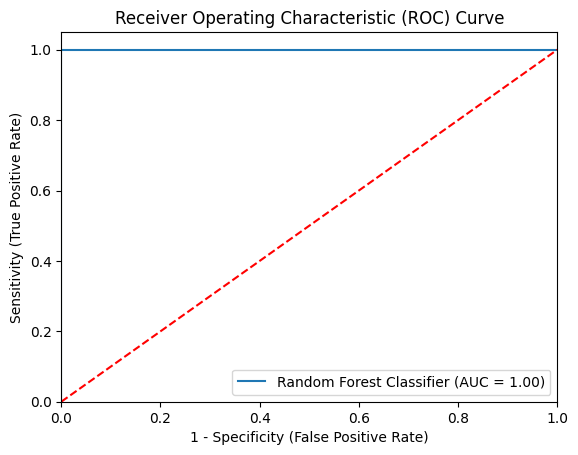

In [50]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=500,min_samples_split=2,
                                          max_features=8,max_depth=None, criterion='gini'),
    'auc':  0.8365
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model']  # Get model
    model.fit(X_train, y_train)  # Train model
    
    # Get prediction probabilities
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    
    # Compute AUC
    auc = roc_auc_score(y_test, y_test_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc:.2f})")

# Plot reference diagonal
plt.plot([0, 1], [0, 1], 'r--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save and show plot
plt.savefig("auc_rf.png")
plt.show()

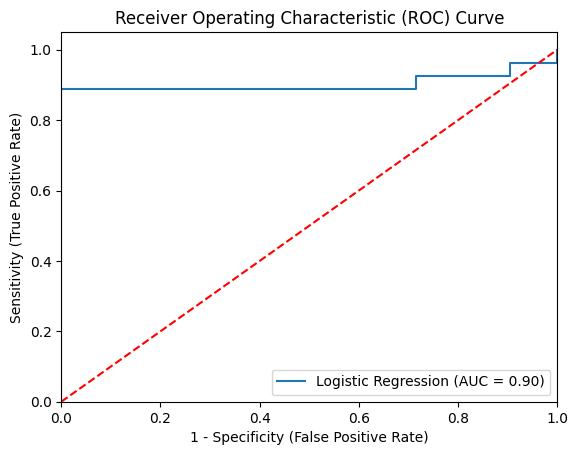

In [51]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Logistic Regression',
    'model':  LogisticRegression(solver='liblinear', penalty='l2',
                                              C=10, max_iter=1000),
    'auc':  0.8365
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model']  # Get model
    model.fit(X_train, y_train)  # Train model
    
    # Get prediction probabilities
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    
    # Compute AUC
    auc = roc_auc_score(y_test, y_test_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc:.2f})")

# Plot reference diagonal
plt.plot([0, 1], [0, 1], 'r--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save and show plot
plt.savefig("auc_lr.png")
plt.show()

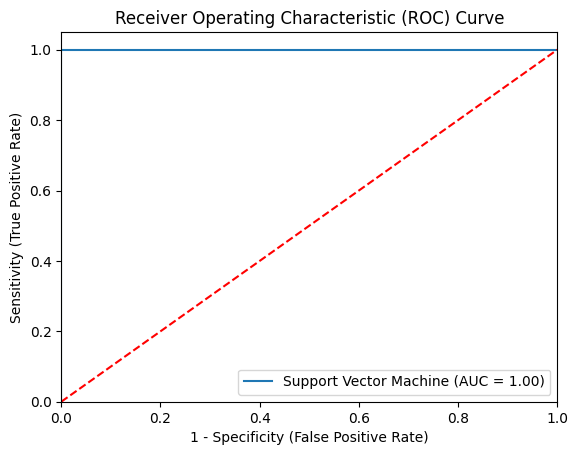

In [52]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Support Vector Machine',
    'model':  SVC(kernel='linear', gamma='auto', C=1, probability=True),
    'auc':  0.8365
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model']  # Get model
    model.fit(X_train, y_train)  # Train model
    
    # Get prediction probabilities
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    
    # Compute AUC
    auc = roc_auc_score(y_test, y_test_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc:.2f})")

# Plot reference diagonal
plt.plot([0, 1], [0, 1], 'r--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save and show plot
plt.savefig("auc_svc.png")
plt.show()

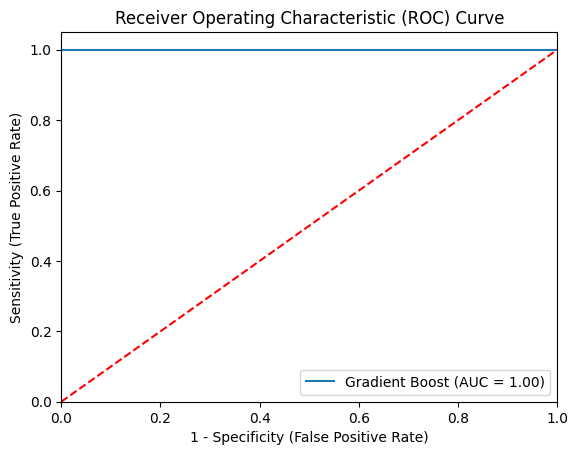

In [53]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Gradient Boost',
    'model':  GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.2),
    'auc':  0.8365
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model']  # Get model
    model.fit(X_train, y_train)  # Train model
    
    # Get prediction probabilities
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    
    # Compute AUC
    auc = roc_auc_score(y_test, y_test_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc:.2f})")

# Plot reference diagonal
plt.plot([0, 1], [0, 1], 'r--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save and show plot
plt.savefig("auc_gb.png")
plt.show()

In [54]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

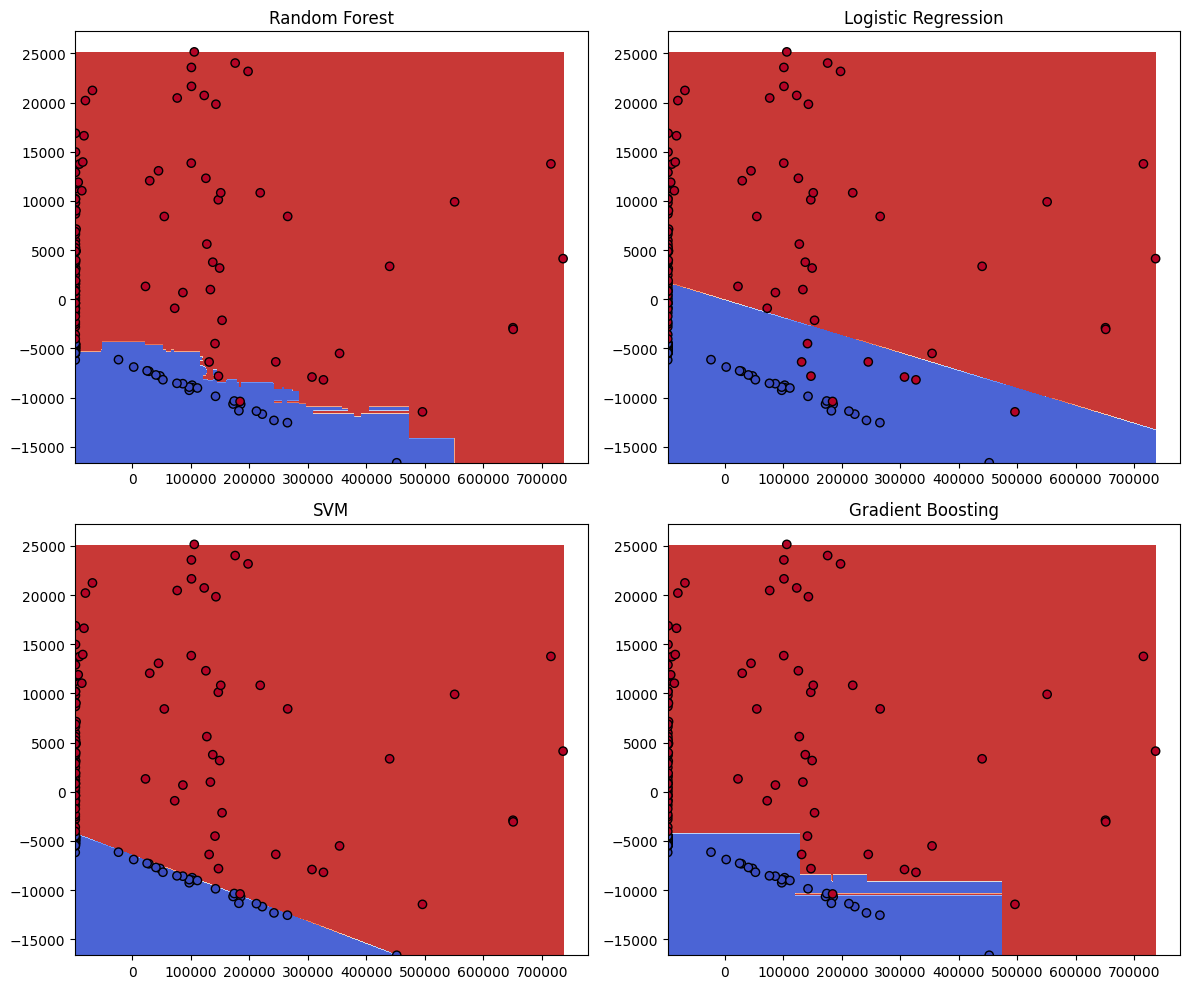

In [55]:
X1, X2 = np.meshgrid(
    np.arange(start=X_train_2d[:, 0].min() - 1, stop=X_train_2d[:, 0].max() + 1, step=10),
    np.arange(start=X_train_2d[:, 1].min() - 1, stop=X_train_2d[:, 1].max() + 1, step=10)
)

# Train all models before plotting
for model_name, model in models.items():
    model.fit(X_train_2d, y_train)

# Plot Decision Boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
axes = axes.flatten()  

for idx, (model_name, model) in enumerate(models.items()):  
    # Reduce meshgrid size to speed up prediction  
    X1_sub = X1[::10, ::10]  
    X2_sub = X2[::10, ::10]  
    predictions = model.predict(np.array([X1_sub.ravel(), X2_sub.ravel()]).T).reshape(X1_sub.shape)  

    # Plot decision boundary
    axes[idx].contourf(X1_sub, X2_sub, predictions, levels=np.linspace(predictions.min(), predictions.max(), 10), cmap=plt.cm.coolwarm)
    
    # Plot training data points
    axes[idx].scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[idx].set_title(model_name)

plt.tight_layout()
plt.show()


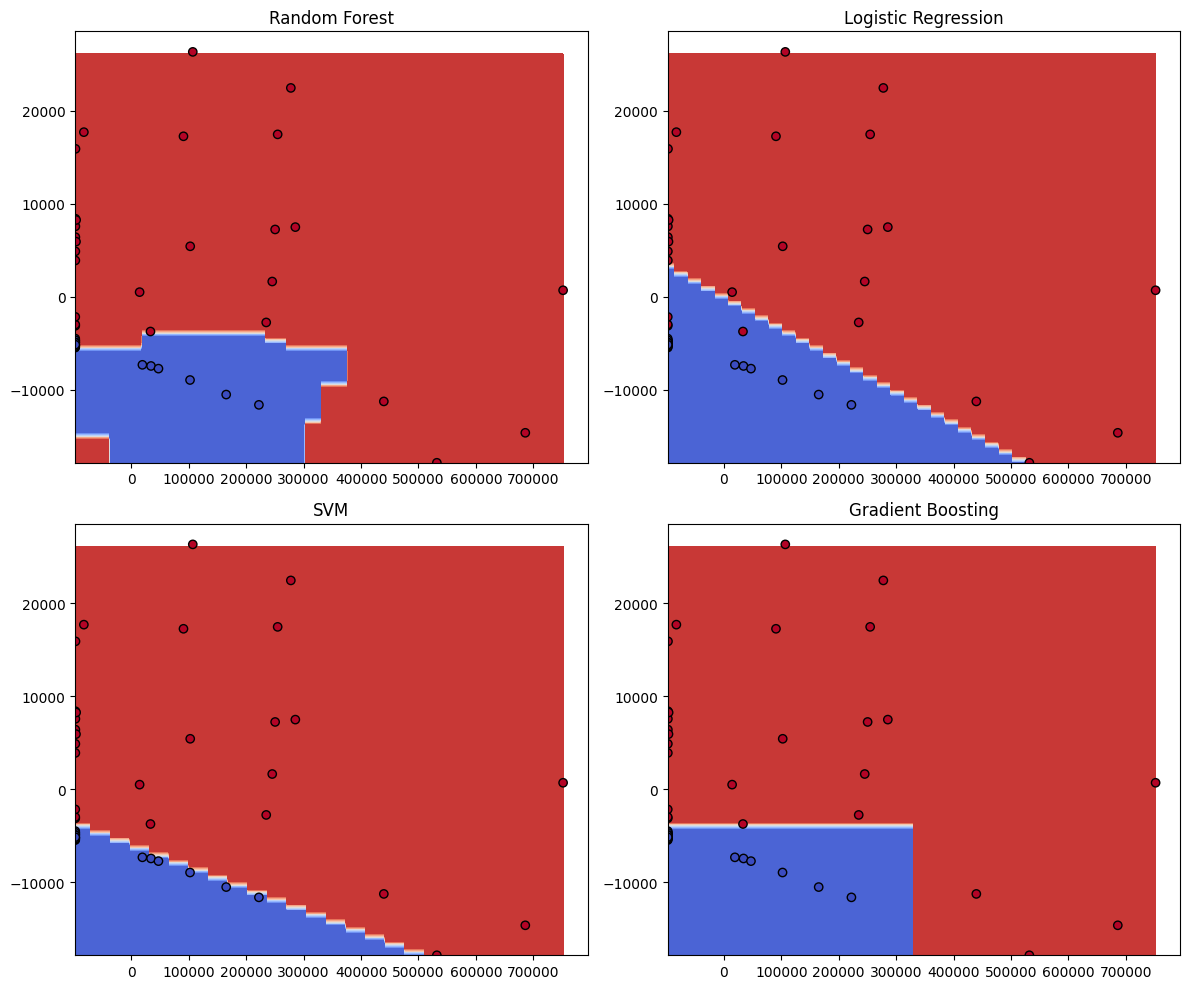

In [62]:
X3, X4 = np.meshgrid(
    np.arange(start=X_test_2d[:, 0].min() - 1, stop=X_test_2d[:, 0].max() + 1, step=40),
    np.arange(start=X_test_2d[:, 1].min() - 1, stop=X_test_2d[:, 1].max() + 1, step=40)
)

# Train all models before plotting
for model_name, model in models.items():
    model.fit(X_test_2d , y_test)

# Plot Decision Boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
axes = axes.flatten()  

for idx, (model_name, model) in enumerate(models.items()):  
    # Reduce meshgrid size to speed up prediction  
    X3_sub = X3[::20, ::20]  
    X4_sub = X4[::20, ::20]  
    predictions = model.predict(np.array([X3_sub.ravel(), X4_sub.ravel()]).T).reshape(X3_sub.shape)  

    # Plot decision boundary
    axes[idx].contourf(X3_sub, X4_sub, predictions, levels=np.linspace(predictions.min(), predictions.max(), 10), cmap=plt.cm.coolwarm)
    
    # Plot training data points
    axes[idx].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[idx].set_title(model_name)

plt.tight_layout()
plt.show()
